## Creating the coordinate files for the labeled subset of our network

In this notebook, I am creating the labelled subset of our network, and also fitting the CA pipeline on all models. All coordinate files for the subsets are saved in separate folders. 

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import prince
import importlib

import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.patches as mpatches

from networkx.algorithms import bipartite


import community as community_louvain
from netgraph import Graph

import sys
sys.path.insert(0, '../Utility files')
import corg
from corg import DiscoverDimension
import seaborn as sn
from corg import BenchmarkDimension
from corg import DiscoverDimension


import utils2
from utils2 import *
import graphfunk
from graphfunk import *

import ca_pipeline
from ca_pipeline import PipelineCorAnalysis





/tmp/ipykernel_1379922/147310087.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Create the labeled subset

Create an empty csv file to fill in manualy (High vs. Low SES)

- The data used to create the labeled df contains a row for each follower relationship a brand has. It includes the original type column, as well as the changed column (condensed from 12 to 4 types.)
- Additionally, it has been filtered to only include markers with more than 100 followers

In [ ]:

# # load data
# path = '/home/livtollanes/NewData/french/french_edgelist_marker_threshold.csv'

# req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2']
# dtypes = {'marker_id': 'object',
#           'follower_id': 'object',
#           'twitter_name': 'object',
#           'followers': 'int64',
#           'french_followers': 'int64',
#           'type': 'object',
#           'type2': 'object'}


# edgelist_CORG = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

# #Separate my data frame into dictionary of types
# def create_dict(df, key_col, value_col):
#     unique_df = df.drop_duplicates(subset=[key_col, value_col])
#     return unique_df.groupby(key_col)[value_col].apply(list).to_dict()


# df_dict = create_dict(edgelist_CORG, 'type', 'twitter_name')
# df_dict2 = create_dict(edgelist_CORG, 'type2', 'twitter_name')


# for key, value in df_dict.items():
#     value = list(set(value))
#     print(f"Key: {key}")
#     print(f"Value: {value}\n")



# # Create a csv file to use for labeling 
# rows = []
# for key, values in df_dict.items():
#     for value in values:
#         row = {'type': key, 'twitter_name': value, 'high': '', 'low': ''}
#         rows.append(row)

# # Now we write the rows to a CSV file
# keys = ['type', 'twitter_name', 'high', 'low']

# with open('/home/livtollanes/10.jan-thesis/labeldata/labeled_markers_empty.csv', 'w', newline='') as output_file:
#     dict_writer = csv.DictWriter(output_file, keys)
#     dict_writer.writeheader()
#     dict_writer.writerows(rows)

Load filled label data

In [ ]:
# # load data
# path = '/home/livtollanes/10.jan-thesis/labeldata/filled_labels_markers.csv'

# req_cols = ['type', 'twitter_name', 'high', 'low', 'other']
# dtypes = {'type': 'object',
#           'twitter_name': 'object',
#           'high': 'object',
#           'low': 'object',
#           'other': 'object'}

# labels_hl = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

Now, reformat the filled in label df

In [ ]:
# # Create the labeled marker df to input to the CORG method

# # Create a copy of labels_hl
# labels_CORG = labels_hl.copy()

# # Create 'SES' column
# labels_CORG['label'] = np.where(labels_CORG['high'] == '1', '1', 
#                               np.where(labels_CORG['low'] == '1', '0', 'drop'))

# # Drop the rows where 'SES' is 'drop'
# labels_CORG = labels_CORG[labels_CORG['label'] != 'drop']

# # Keep only 'twitter_name' and 'SES' columns
# labels_CORG = labels_CORG[['twitter_name', 'label']]

In [ ]:

# # load data
# path = '/home/livtollanes/NewData/french/french_edgelist_marker_threshold.csv'

# req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2']
# dtypes = {'marker_id': 'object',
#           'follower_id': 'object',
#           'twitter_name': 'object',
#           'followers': 'int64',
#           'french_followers': 'int64',
#           'type': 'object',
#           'type2': 'object'}


# all = pd.read_csv(path, usecols=req_cols, dtype=dtypes)


# #Include only edges with markers that have been labeled
# labeled = all[all['twitter_name'].isin(labels_CORG['twitter_name'])]

# #Add the label column
# labeled_edgelist = labeled.merge(labels_CORG[['twitter_name', 'label']], on='twitter_name', how='left')

In [ ]:

# #Add the label column
# labeled_edgelist = labeled.merge(labels_CORG[['twitter_name', 'label']], on='twitter_name', how='left')

# summary_stats(labeled_edgelist) #This leaves us with 65 745 followers

# #Save the labeled edgelist to csv in /home/livtollanes/NewData
# labeled_edgelist.to_csv('/home/livtollanes/NewData/french/labeled_edgelist_hl.csv', index=False)

### 2. Obtaining CA coordinate files for all models (labelled markers only)

#### 2.1 Creating models

In [2]:
# load the labeled marker edgelist (labeled markers and their followers)
path = '/home/livtollanes/NewData/french/labeled_edgelist_hl.csv'

req_cols = ['marker_id', 'follower_id', 'twitter_name','followers','french_followers', 'type', 'type2', 'label']
dtypes = {'marker_id': 'object',
          'follower_id': 'object',
          'twitter_name': 'object',
          'followers': 'int64',
          'french_followers': 'int64',
          'type': 'object',
          'type2': 'object',
          'label': 'object'}


m1_df = pd.read_csv(path, usecols=req_cols, dtype=dtypes)

In [5]:
summary_stats(m1_df)


Shape of DataFrame:  (135832, 8)

Columns in DataFrame:  ['marker_id', 'follower_id', 'twitter_name', 'type', 'followers', 'french_followers', 'type2', 'label']

Data types of columns:
 marker_id           object
follower_id         object
twitter_name        object
type                object
followers            int64
french_followers     int64
type2               object
label               object
dtype: object

Number of unique values in 'follower_id':  65745
Number of duplicate values in 'follower_id':  70087

Number of unique values in 'marker_id':  36
Number of duplicate values in 'marker_id':  135796

Number of missing values in each column:
'marker_id':  0
'follower_id':  0
'twitter_name':  0
'type':  0
'followers':  0
'french_followers':  0
'type2':  0
'label':  0

Number of duplicate rows:  0


In [3]:
# create models for different subsets of the data 
m2_df = m1_df[m1_df['type'] != 'party']
m3_df = m1_df[~m1_df['type'].isin(['party', 'universities'])]
m4_df = m1_df[~m1_df['type'].isin(['party', 'universities','luxe vetements et malls'])]

selected_twitter_names = ['Dior', 'CHANEL', 'LouisVuitton', 'YSL', 'Cartier', 'Hermes_Paris', 'VeuveClicquot']
m5_df = m1_df[~((m1_df['type'] == 'party') | 
                (m1_df['type'] == 'universities') | 
                ((m1_df['type'] == 'luxe vetements et malls') & (m1_df['twitter_name'].isin(selected_twitter_names))))]

m6_df = m1_df[m1_df['type'].isin(['chain restaurants', 'grande distribution', 'luxe vetements et malls'])]

m7_df = m1_df[m1_df['type'].isin(['magazine'])]
m8_df = m1_df[m1_df['type'].isin(['universities', 'ecoles de commerce', 'Lycées professionels'])]

m9_df = m1_df[m1_df['type'].isin(['party'])]

#### 2.2 Fitting CA

Starting graph checks...
Number of nodes: 65781
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 65781
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


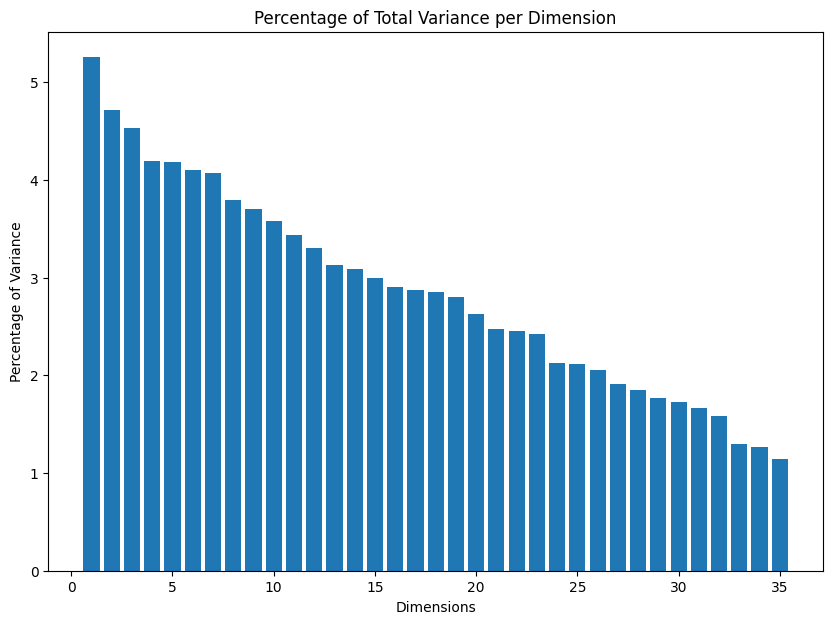

CA pipeline complete.


In [5]:
#m1
importlib.reload(ca_pipeline)
subset_name = 'm1_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m1_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 50044
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 50044
Number of communities: 2
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


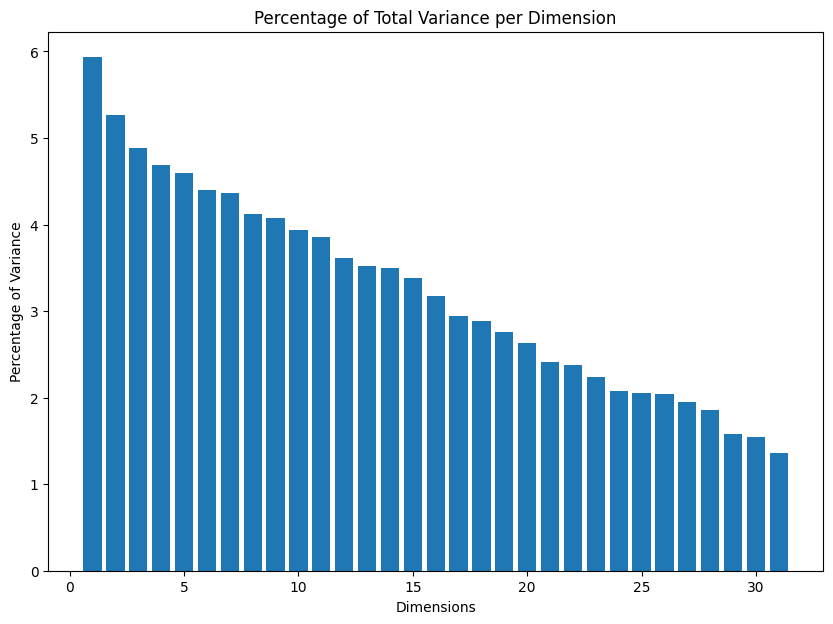

CA pipeline complete.


In [6]:
#m2
importlib.reload(ca_pipeline)
subset_name = 'm2_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m2_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 43196
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 43196
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


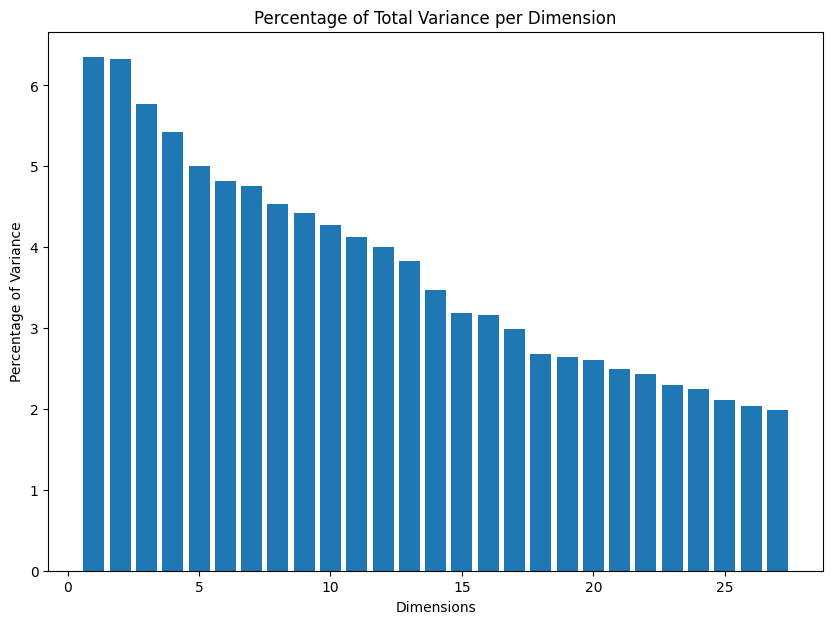

CA pipeline complete.


In [7]:
#m3
importlib.reload(ca_pipeline)
subset_name = 'm3_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m3_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 42866
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 42866
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


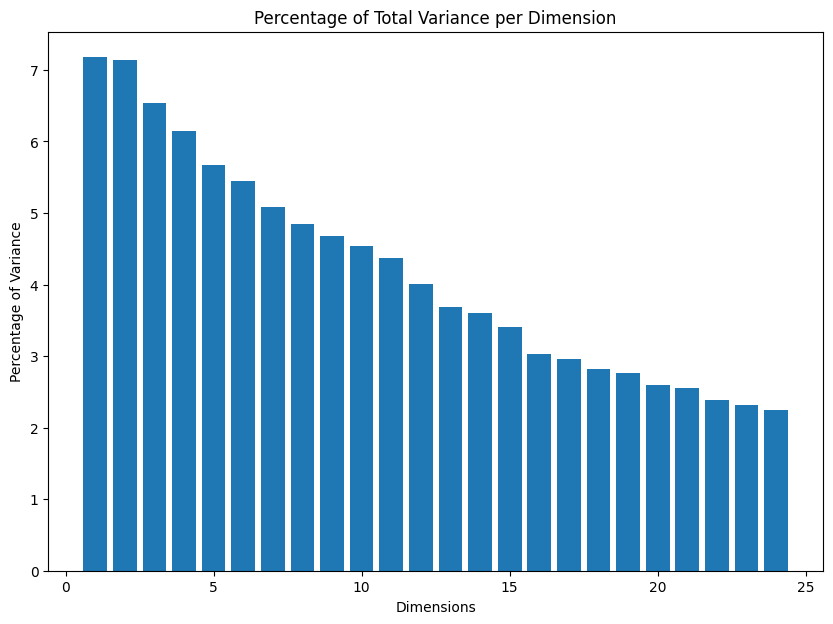

CA pipeline complete.


In [8]:
#m4
importlib.reload(ca_pipeline)
subset_name = 'm4_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m4_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 43066
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 43066
Number of communities: 3
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


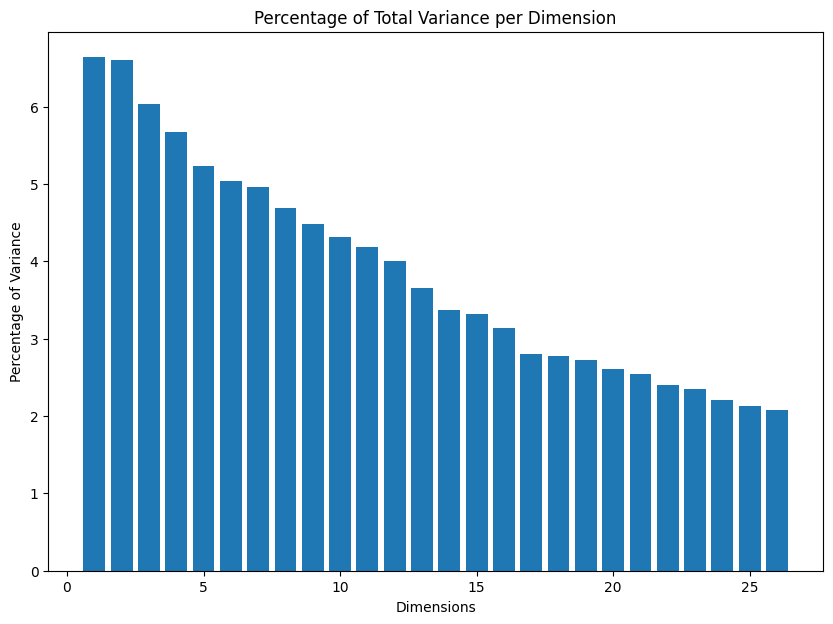

CA pipeline complete.


In [9]:
#m5
importlib.reload(ca_pipeline)
subset_name = 'm5_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m5_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 15692
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 15692
Number of communities: 2
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


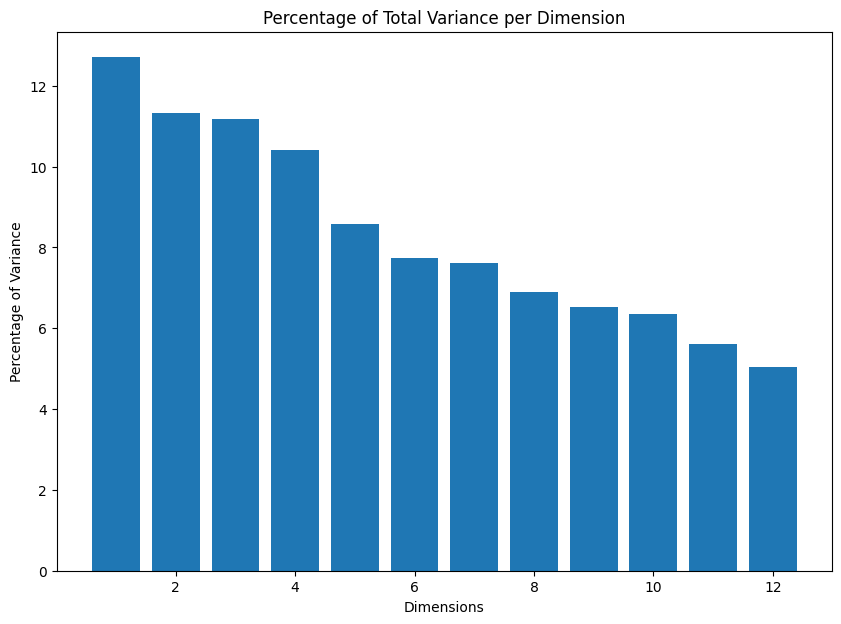

CA pipeline complete.


In [10]:
#m6
importlib.reload(ca_pipeline)
subset_name = 'm6_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m6_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 27666
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 27666
Number of communities: 2
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


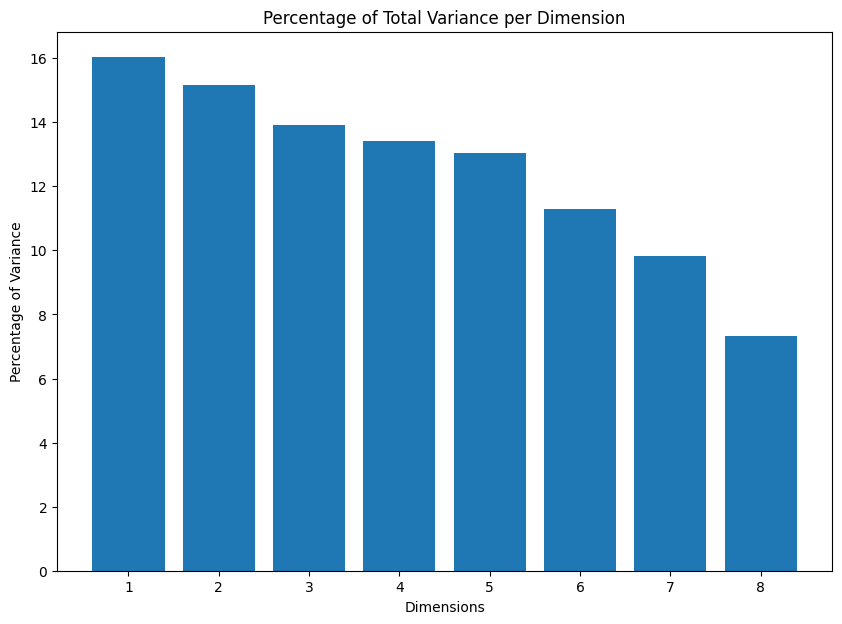

CA pipeline complete.


In [11]:
#m7
importlib.reload(ca_pipeline)
subset_name = 'm7_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m7_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 17507
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 17507
Number of communities: 2
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


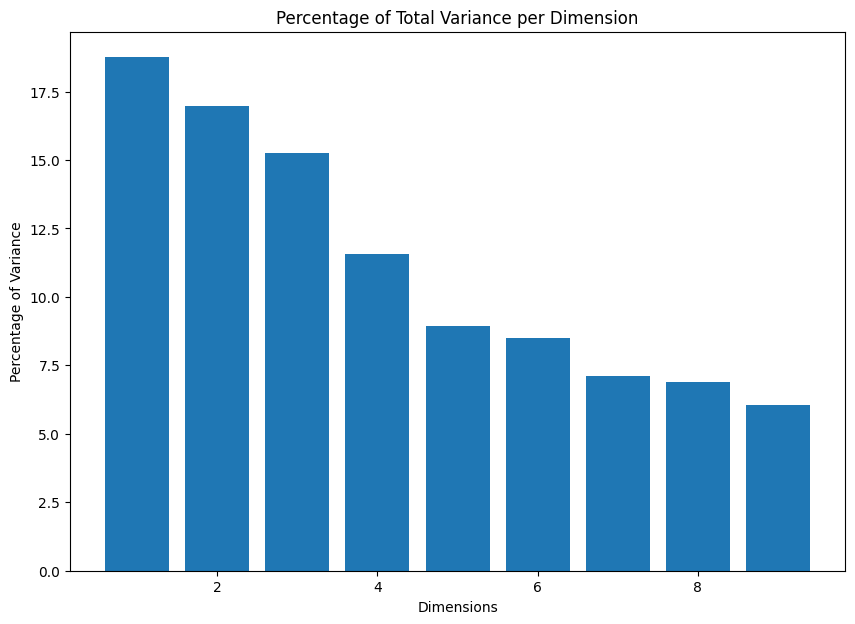

CA pipeline complete.


In [12]:
#m8
importlib.reload(ca_pipeline)
subset_name = 'm8_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m8_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)

Starting graph checks...
Number of nodes: 27978
Edge number is sane - matches the number of rows in the inputted edgelist
Is the graph connected? True
Number of connected components: 1
Size of largest connected component: 27978
Number of communities: 1
Graph checks complete. Starting CA fitting pipeline...
Creating contingency table...
Performing CA analysis. Might take some time...
Plotting variance...


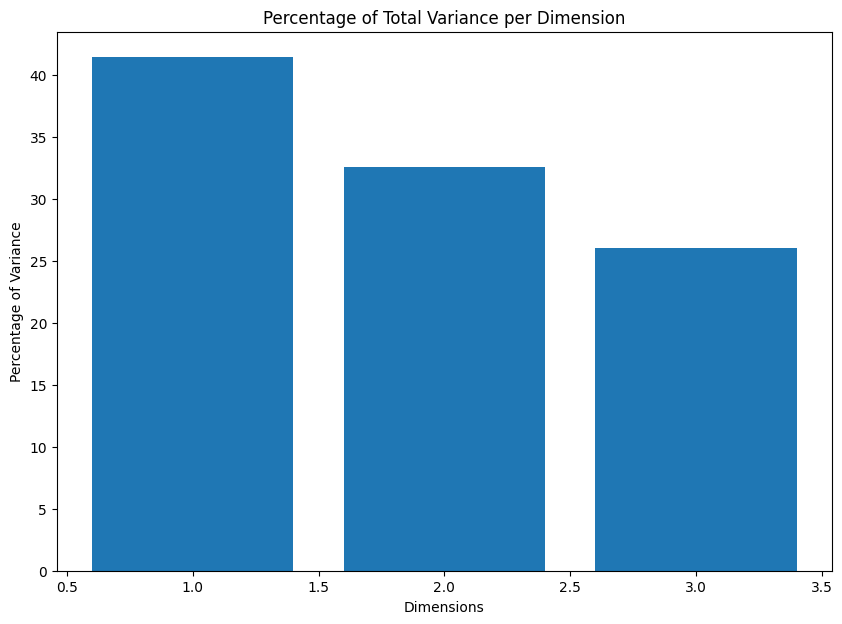

CA pipeline complete.


In [13]:
#m9
importlib.reload(ca_pipeline)
subset_name = 'm9_lab'
labeled = ca_pipeline.PipelineCorAnalysis(m9_df, subset_name)
path = '/home/livtollanes/NewData/coordinates_labeled_subsets/'
labeled.run_all(path)